In [1]:
import pandas as pd
from nltk.stem import PorterStemmer as Stemmer
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from nltk import sent_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from re import sub as regex

In [2]:
df = pd.read_csv("spam.csv", encoding="latin")
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df["type"] = (df["type"] == "spam").astype(int)
# Removes special characters - only letters and numbers remain + lowers text
df["filteredSMS"] = df["sms"].apply(lambda sms: regex(r"[^a-zA-Z0-9]", " ", sms.lower()))
# Utilizes NLTK to tokenize text
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: word_tokenize(sms))
# Utilizes removes NLTK stopwords from sms
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: [word for word in sms if word not in stopwords.words("english")])
# Removing SMS if SMS is empty after removing all stopwords
df = df.dropna()
# Utilizes NLTK Stemmer to stem words
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: [Stemmer().stem(word) for word in sms])
# Saves the processed sms in a string
df["processedSMS"] = df["filteredSMS"].apply(lambda sms: " ".join(sms))
df.sample(5)

,type,sms,filteredSMS,processedSMS
5134,0,Sday only joined.so training we started today:),"[sday, join, train, start, today]",sday join train start today
5244,0,thanks for the temales it was wonderful. Thank...,"[thank, temal, wonder, thank, great, week]",thank temal wonder thank great week
3892,0,Have you heard from this week?,"[heard, week]",heard week
2000,0,But i'll b going 2 sch on mon. My sis need 2 t...,"[b, go, 2, sch, mon, si, need, 2, take, smth]",b go 2 sch mon si need 2 take smth
4246,1,Text PASS to 69669 to collect your polyphonic ...,"[text, pass, 69669, collect, polyphon, rington...",text pass 69669 collect polyphon rington norma...


Text(0, 0.5, 'Number of SMS')

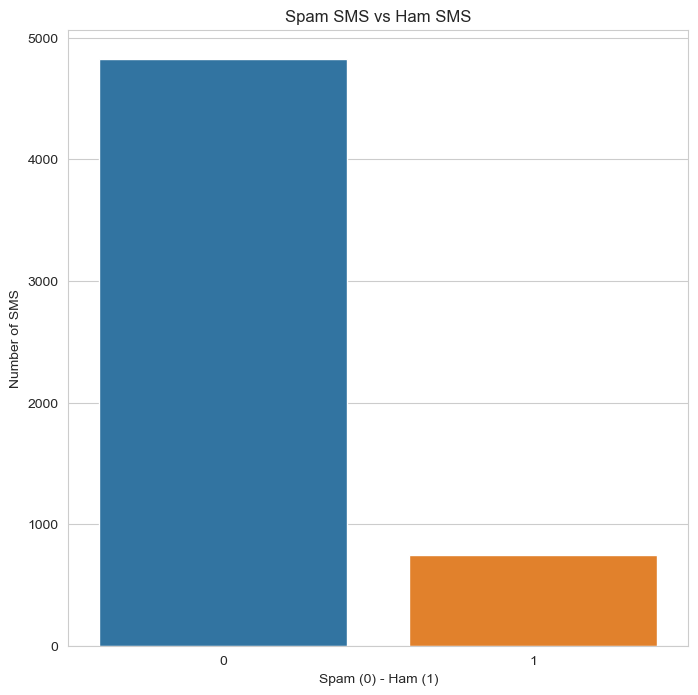

In [3]:
plt.figure(figsize=(8, 8))
sns.countplot(x="type", data=df)
plt.title("Spam SMS vs Ham SMS")
plt.xlabel("Spam (0) - Ham (1)")
plt.ylabel("Number of SMS")

S:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


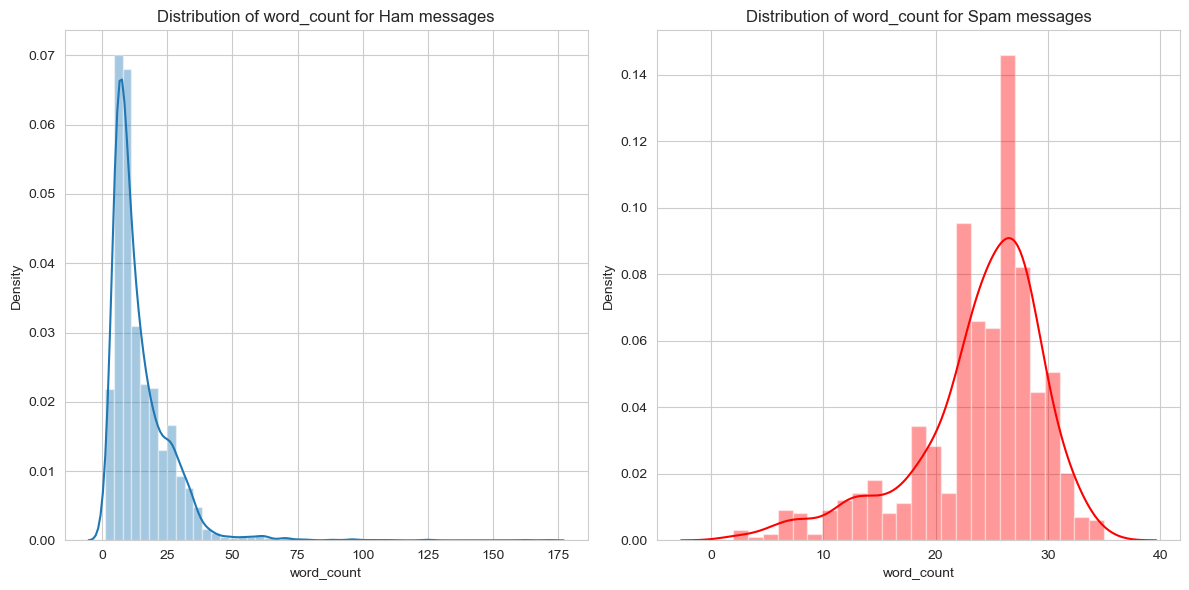

In [4]:
plt.figure(figsize=(12, 6))
df["word_count"] = df["sms"].apply(lambda x: len(x.split()))

plt.subplot(1, 2, 1)
sns.distplot(a=df[df["type"] == 0].word_count)
plt.title("Distribution of word_count for Ham messages")

plt.subplot(1, 2, 2)
sns.distplot(a=df[df["type"] == 1].word_count, color="red")
plt.title("Distribution of word_count for Spam messages")

plt.tight_layout()
plt.show()

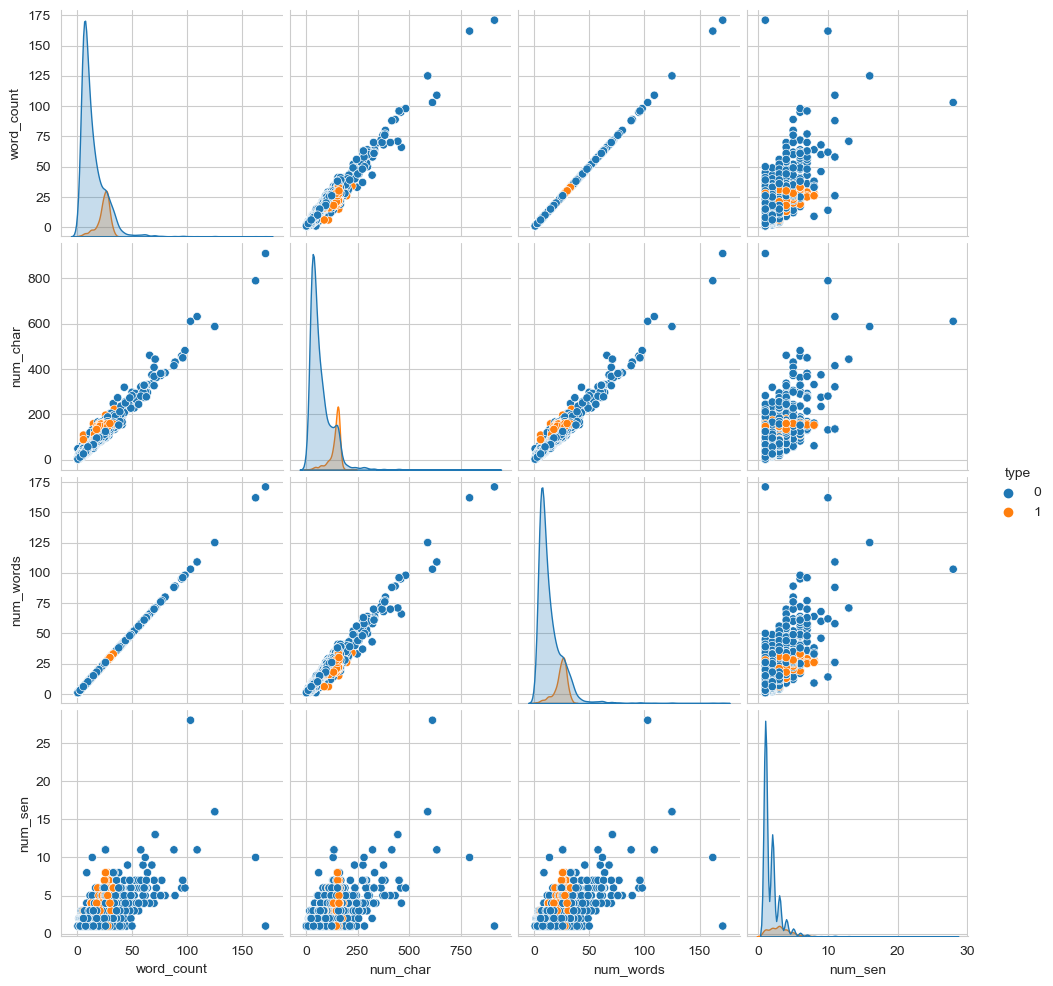

In [5]:
df["num_char"]= df["sms"].apply(len)
df["num_words"]= df["sms"].apply(lambda x: len(str(x).split()))
df["num_sen"]= df["sms"].apply(lambda x: len(sent_tokenize(x)))
sns.pairplot(df, hue="type")
plt.show()

In [6]:
def words(type):
    word_bank = ""
    for sms, label in zip(df["sms"], df["type"]):
        if label == type:
            sms = sms.lower()
            sms = regex("[^a-z]+", " ", sms)
            sms = word_tokenize(sms)
            sms = [word for word in sms if word not in stopwords.words("english")]
            sms = " ".join(sms)
            word_bank += sms
    return word_bank

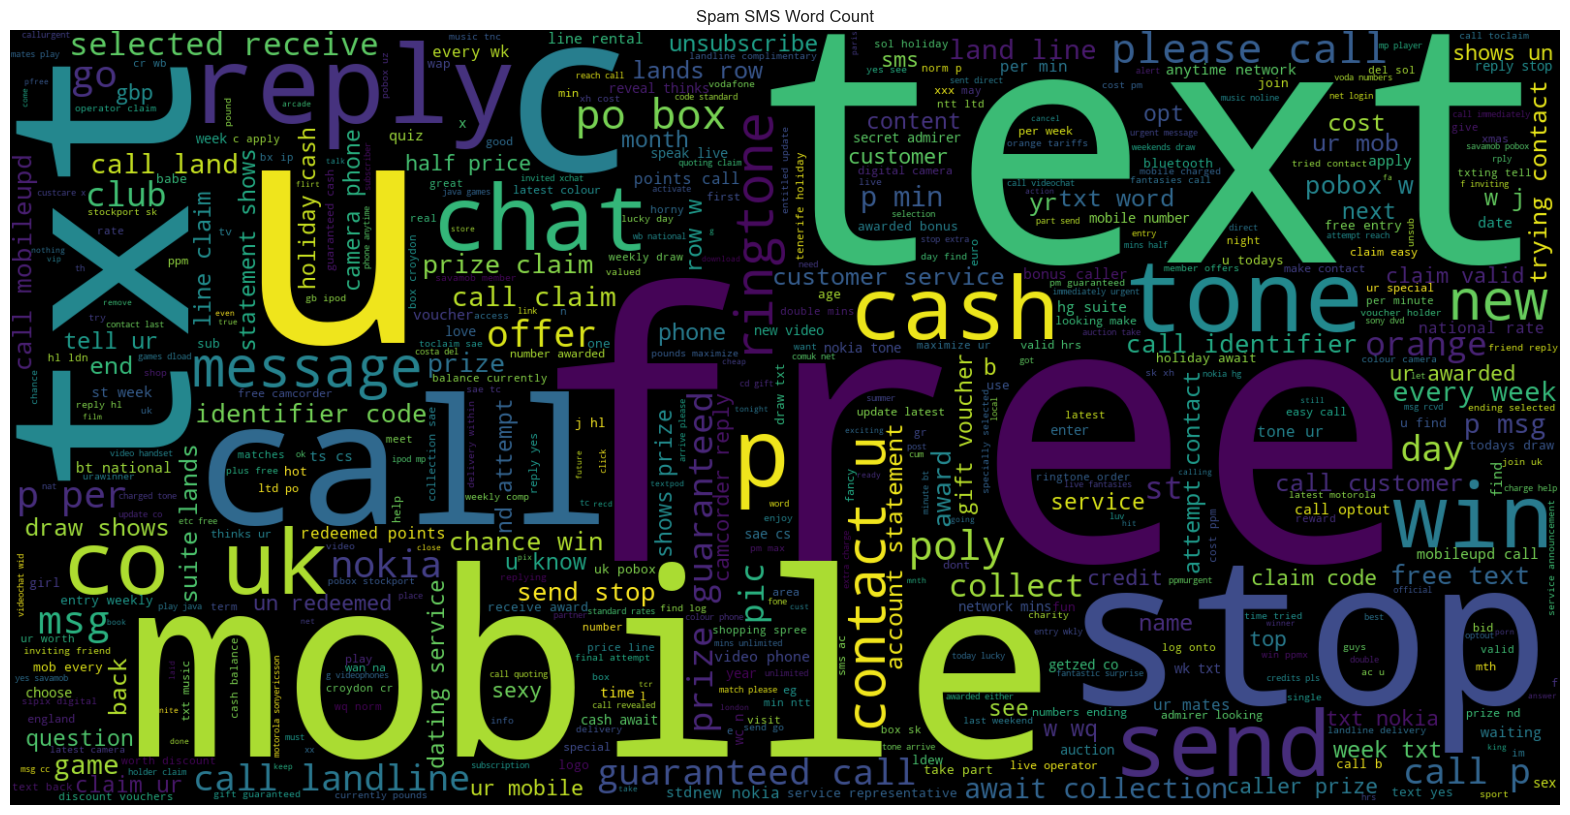

In [7]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud(width = 1600 , height = 800 , max_words = 500,background_color="black").generate(words(1)) , interpolation = "bilinear")
plt.title("Spam SMS Word Count")
plt.axis("off")
plt.show()

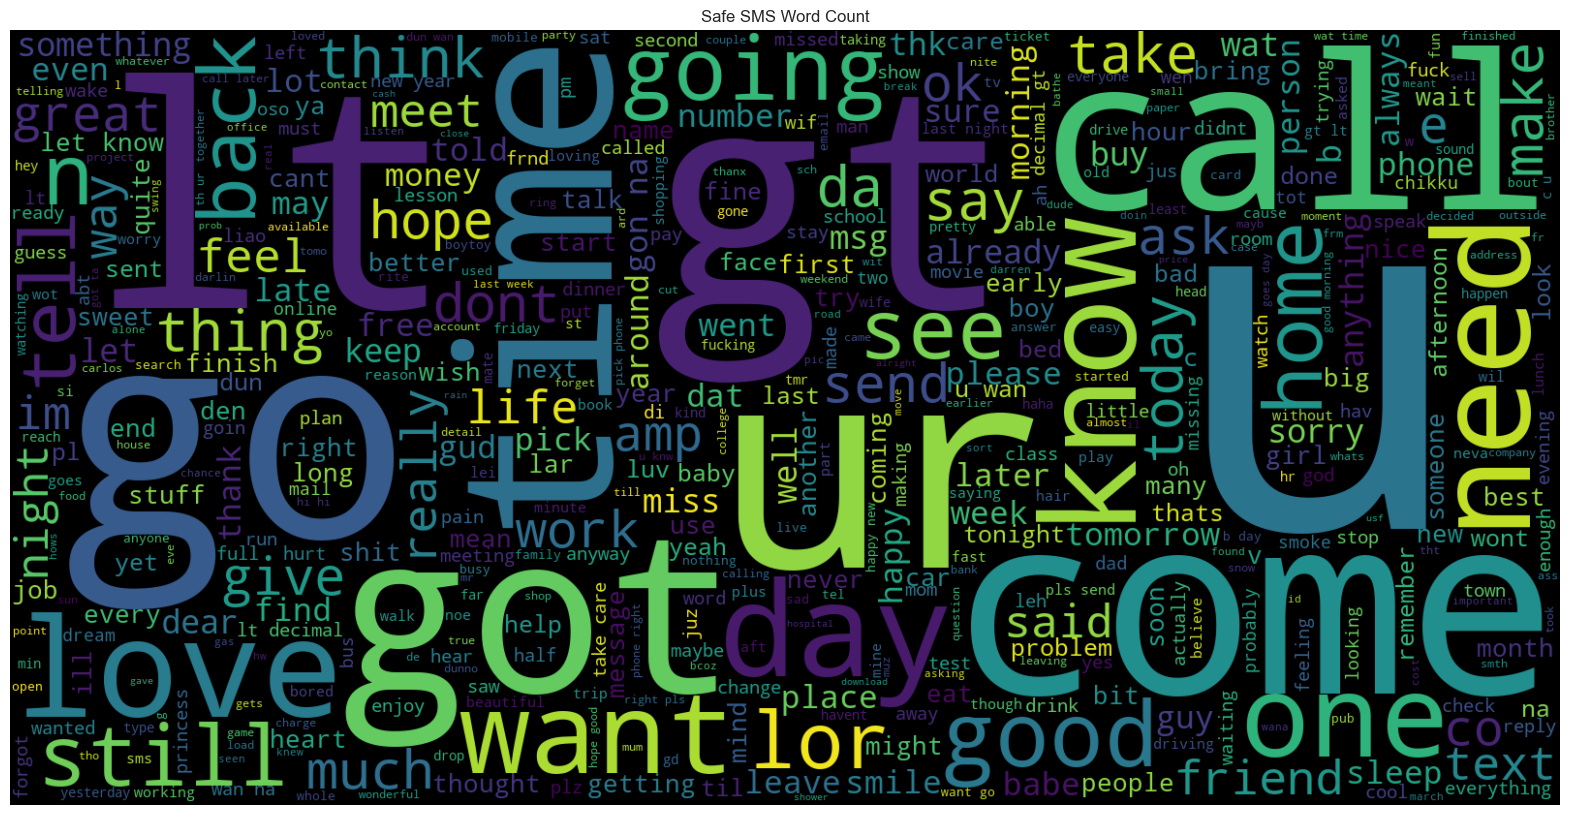

In [8]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud(width = 1600 , height = 800 , max_words = 500,background_color="black").generate(words(0)) , interpolation = "bilinear")
plt.title("Safe SMS Word Count")
plt.axis("off")
plt.show()